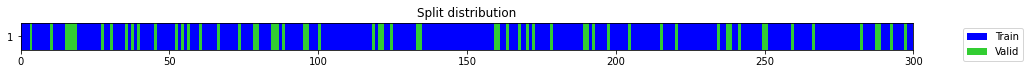

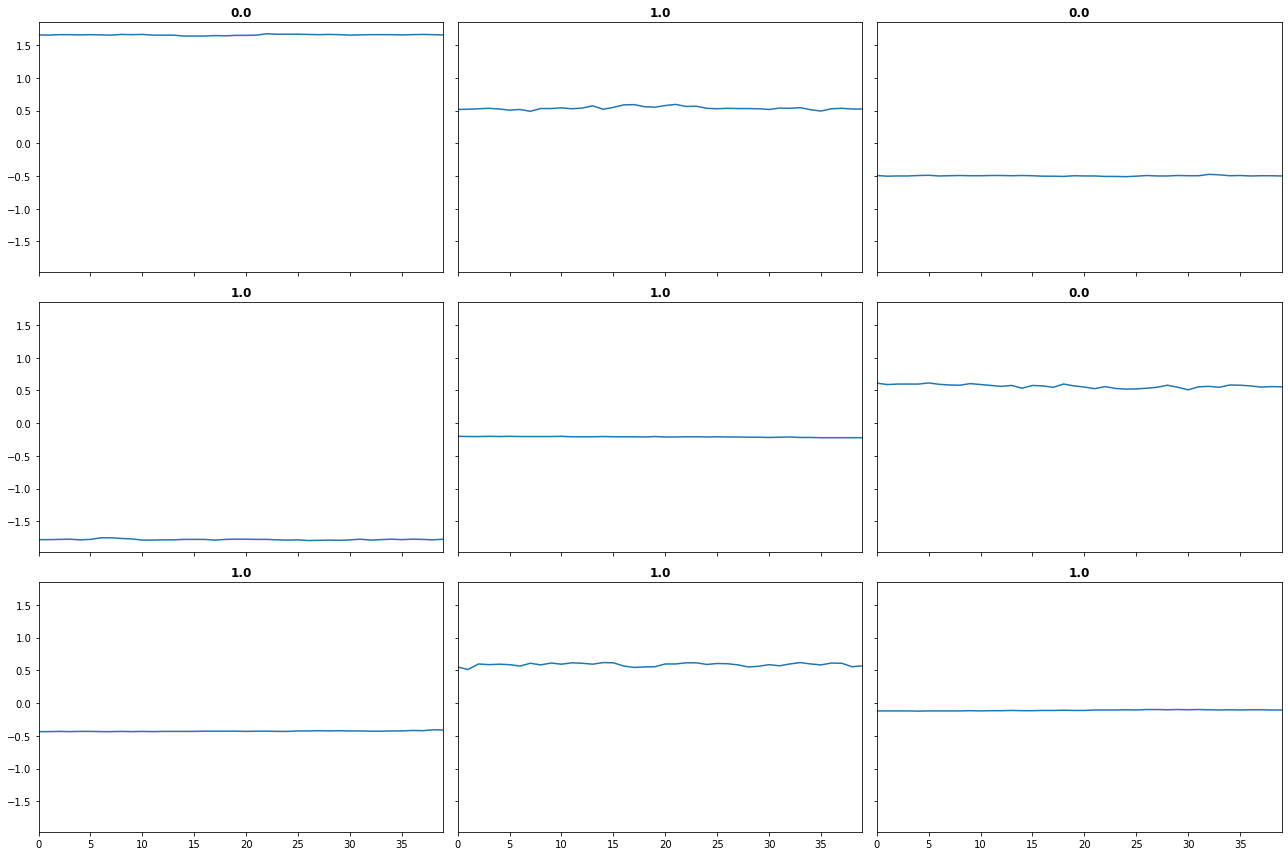

In [19]:
from tsai.all import *
import pandas as pd

test_df = pd.read_csv('/Users/adi/Documents/code/tsai_test/gesammelt_test.tsv', sep="\t", header=None)
test_df = test_df.rename(columns={0: 'target'})


train_df = pd.read_csv('/Users/adi/Documents/code/tsai_test/gesammelt_train.tsv', sep="\t", header=None)
train_df = train_df.rename(columns={0: 'target'})

df = pd.concat([test_df, train_df], ignore_index=True)
X, y = df2xy(df, target_col='target')

splits = get_splits(y, valid_size=.2, stratify=True, random_state=23, shuffle=True)
splits


# X_train, y_train = df2xy(train_df, target_col='target')
# np.shape(X)
# test_eq(X_test.shape, (60, 1, 40))
# test_eq(y_test.shape, (60, ))


tfms  = [None, [Categorize()]]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits, inplace=True)

dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[64, 128], batch_tfms=[TSStandardize()], num_workers=0)

dls.show_batch(sharey=True)

In [20]:
model = InceptionTime(dls.vars, dls.c)
learn = Learner(dls, model, metrics=accuracy)
learn.save('stage0')

Path('models/stage0.pth')

SuggestedLRs(valley=0.0005754399462603033)

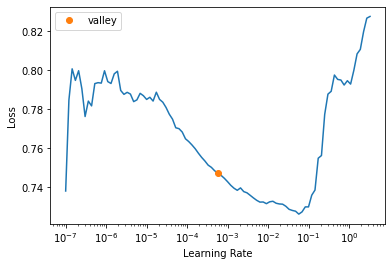

In [21]:
learn.load('stage0')
learn.lr_find()

In [22]:
learn.fit_one_cycle(25, lr_max=1e-3)
learn.save('stage1')

epoch,train_loss,valid_loss,accuracy,time
0,0.771121,0.697953,0.616667,00:00
1,0.754248,0.696776,0.416667,00:00
2,0.740153,0.696900,0.433333,00:00
3,0.731570,0.700061,0.483333,00:00
4,0.732189,0.701259,0.500000,00:00
5,0.730134,0.701199,0.500000,00:00
6,0.728033,0.710151,0.500000,00:00
7,0.722857,0.708363,0.433333,00:00
8,0.721549,0.715695,0.433333,00:00
9,0.719159,0.719618,0.383333,00:00


Path('models/stage1.pth')

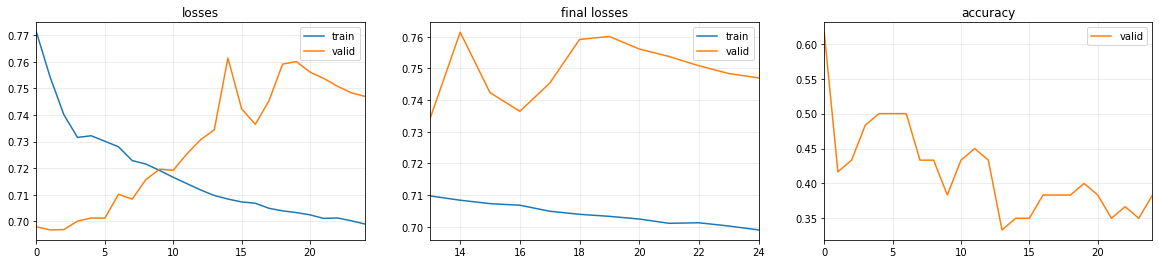

In [23]:
learn.recorder.plot_metrics()

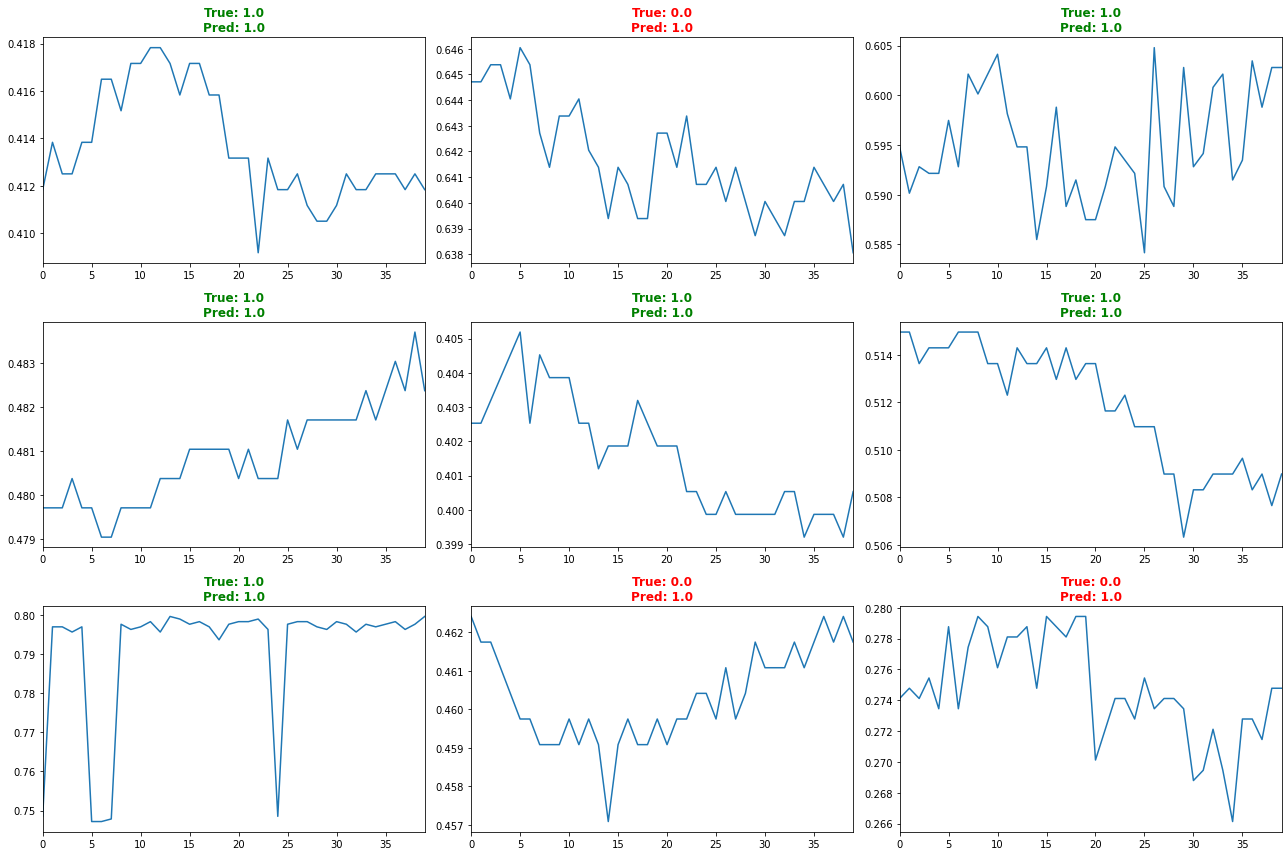

In [27]:
learn.show_results()